In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
##      customerID this is no matter for predicting churn so drop this
df.drop('customerID',axis=1, inplace=True)

In [5]:

#  lets check the dataset  shape
df.shape    

(7043, 20)

In [7]:
# # lets check the null value in this dataset
df.isnull().sum()     # there is no null value in this dataset

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:

df.info()  # maximum columns in this dataset is object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:

for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())
    print()


Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

In [7]:
#  convert the 'TotalCharges' datatypes into 'float'
df['TotalCharges'].replace(' ', np.nan, inplace=True)           # blank character replace Nan value      
df['TotalCharges']= df['TotalCharges'].astype('float64')           # convert into float datatype 

#  lets impute the TotalCharges Attributes by that mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace =True)

In [8]:
df['TotalCharges'].dtypes   # 

dtype('float64')

In [10]:
#  Statistical description
df.describe()  

# according to this description in this dataset does not have Outliers or will be negligible

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
LETS START EDA

<AxesSubplot:ylabel='Churn'>

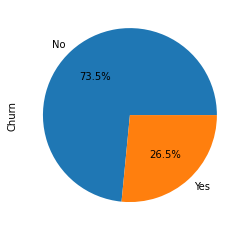

In [21]:
# Target_feature is imbalanced because elements ratio 73:26 , it should be almost equal ratio

df['Churn'].value_counts().plot.pie(autopct= '%1.1f%%')

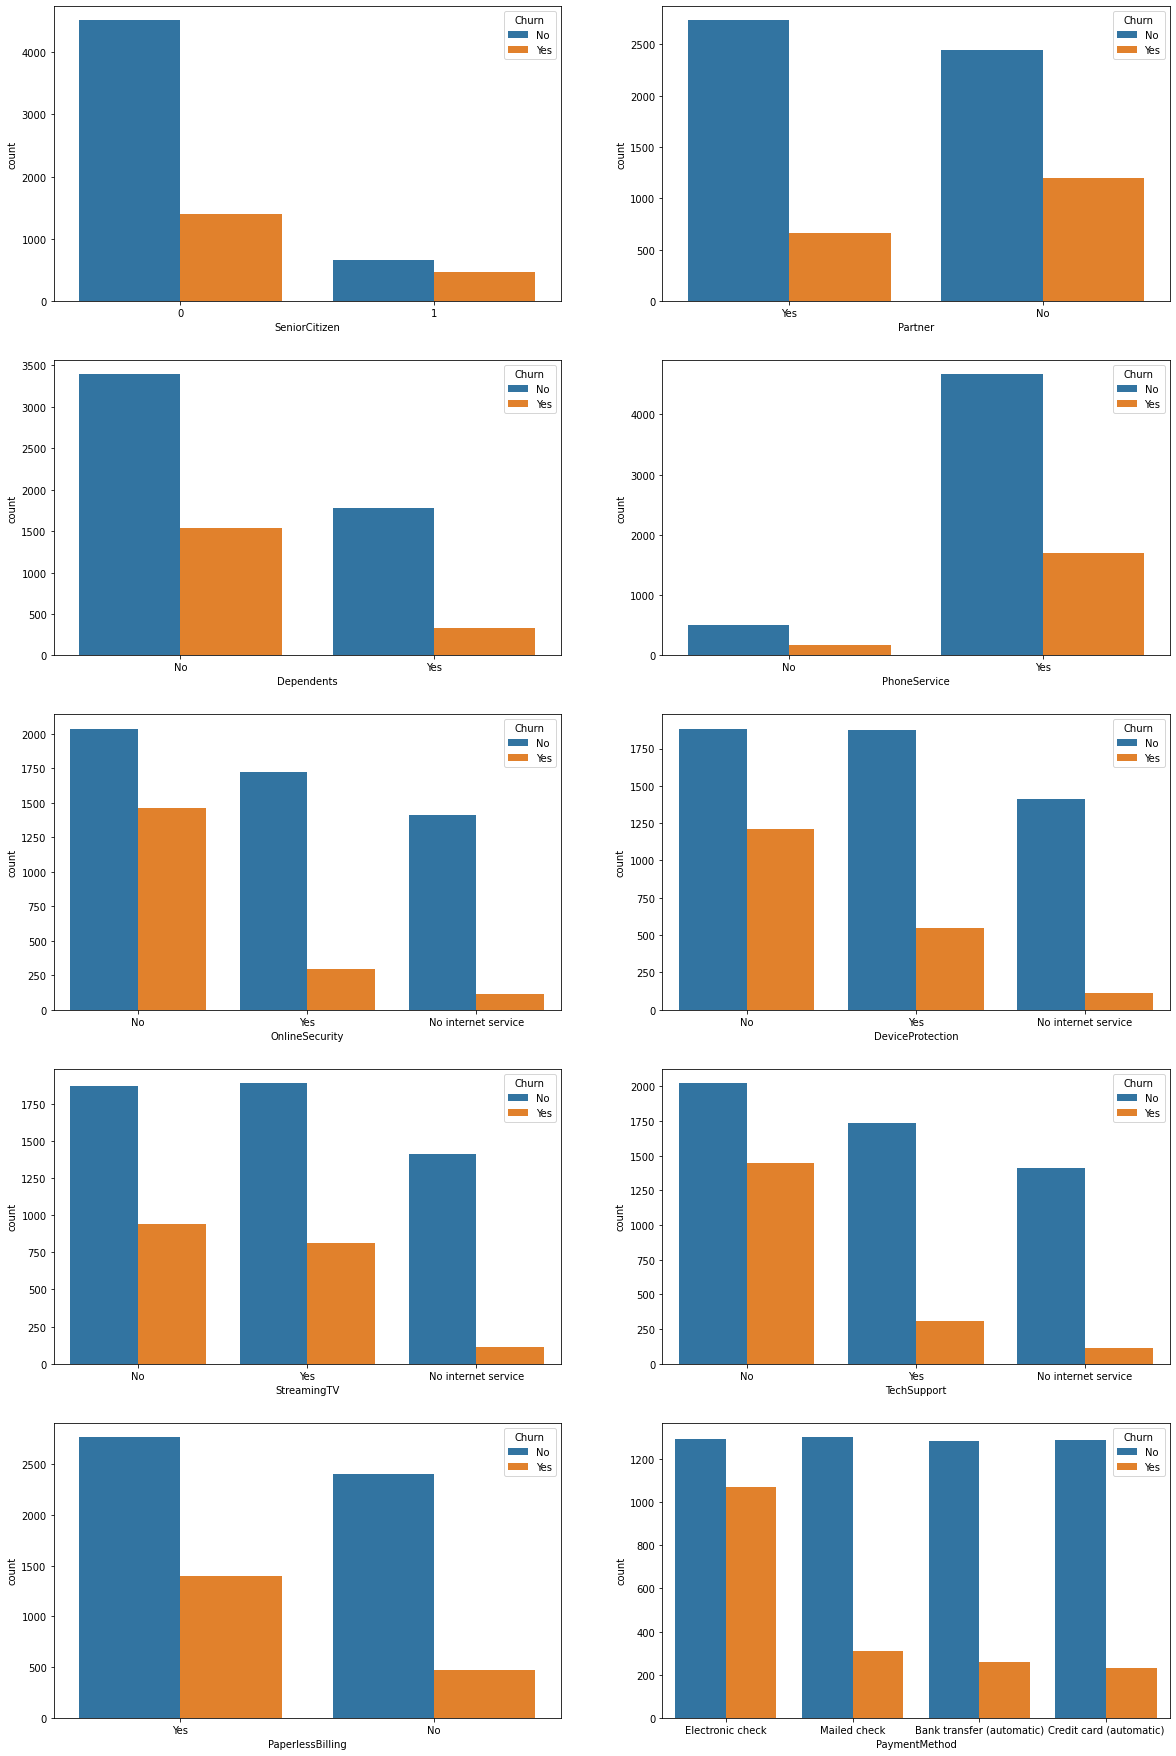

In [23]:

# plotting countplot of categorical type columns with 'churn'
column=['SeniorCitizen', 'Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','StreamingTV',
       'TechSupport','PaperlessBilling','PaymentMethod']

plt.figure(figsize=(20,38))
p=1
for col in column:
    if p<= 12:
        ax= plt.subplot(6,2,p)
        sns.countplot(x= col, data=df, hue='Churn')
    p+=1
plt.show()


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

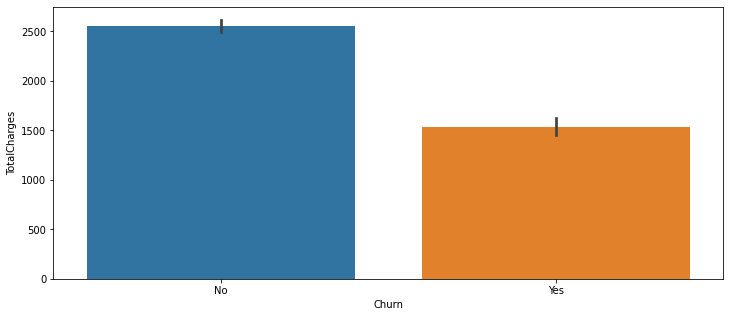

In [55]:
#
plt.figure(figsize=(12,5))
sns.barplot( df['Churn'] , df['TotalCharges'])

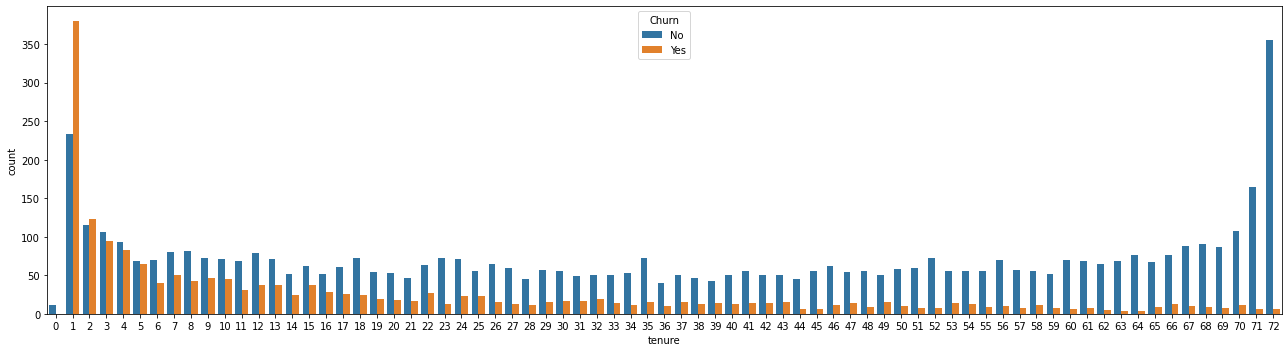

In [46]:
# WE CHECKING 'TENURE' COLUMN THAT HOW IMPACT ITS ON tARGET(CHURN) 
plt.figure(figsize=(18,5))
sns.countplot(df['tenure'], hue=df['Churn'])
plt.tight_layout()
# the customer whose tenure 1 to 5 those about 50 percent possisbility to churn = No or Yes
# the customer tenure are increasing more 10 then some more chances to those churn= No, & 
# the customer whose tenure are increasing more then even their increasing more chances to Churn=No 

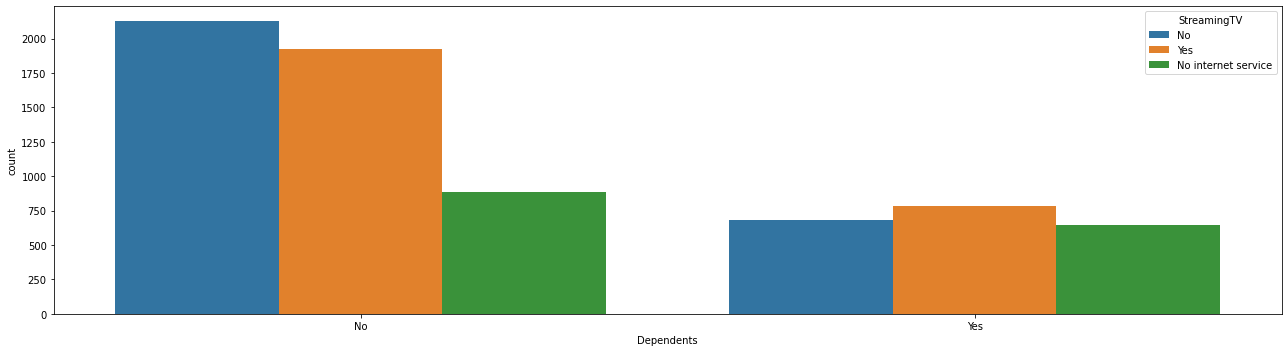

In [53]:

plt.figure(figsize=(18,5))
sns.countplot(df['Dependents'], hue=df['StreamingTV'])
plt.tight_layout()

<AxesSubplot:xlabel='Dependents', ylabel='TotalCharges'>

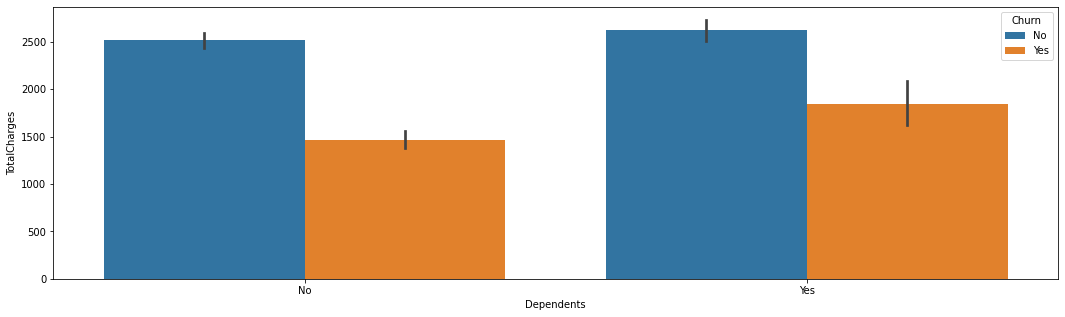

In [25]:
#
plt.figure(figsize=(18,5))
sns.barplot(df['Dependents'], df['TotalCharges'], hue= df['Churn'])

<AxesSubplot:xlabel='Dependents', ylabel='MonthlyCharges'>

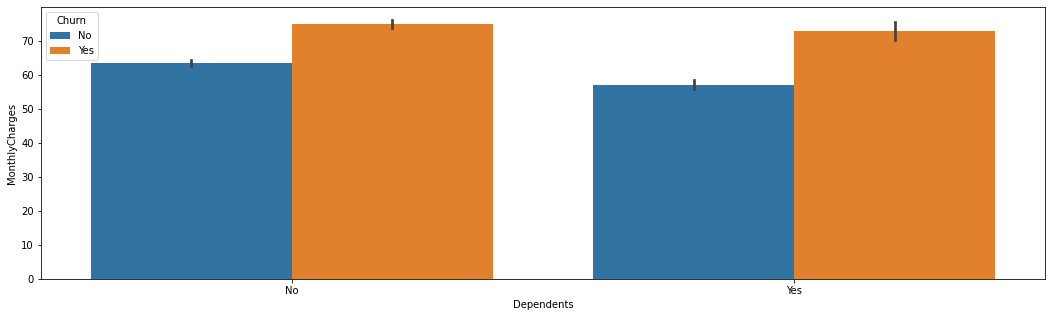

In [29]:
# PLOTTING BARPLOT   OF  Dependents  VS MonthlyCharges
plt.figure(figsize=(18,5))
sns.barplot(df['Dependents'], df['MonthlyCharges'], hue= df['Churn'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

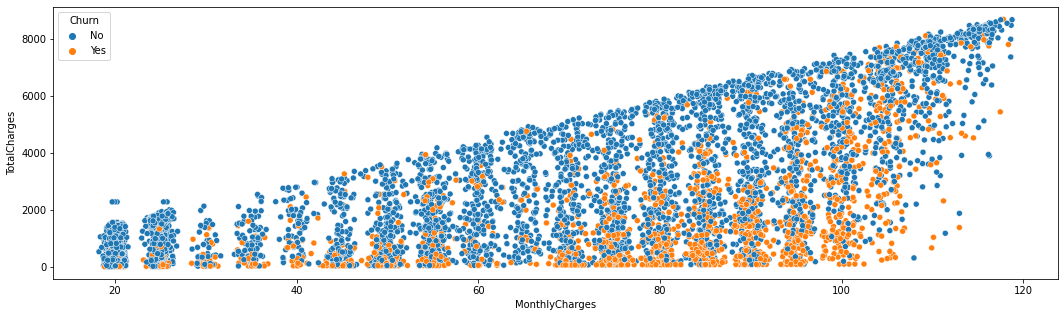

In [26]:
# lets check that 'MonthlyCharges' & 'TotalCharges' , whether these two columns makes any relation 
#     with Churn or not

# PLOTTING SCATTERPLOT OF  MonthlyCharges   VS  TotalCharges
plt.figure(figsize=(18,5))
sns.barplot(df['MonthlyCharges'], df['TotalCharges'], hue= df['Churn'])
# shown in scatterplot  
#   as it is monthlyCharges increases so customer Churn= Yes also increasing 

<AxesSubplot:xlabel='tenure', ylabel='Density'>

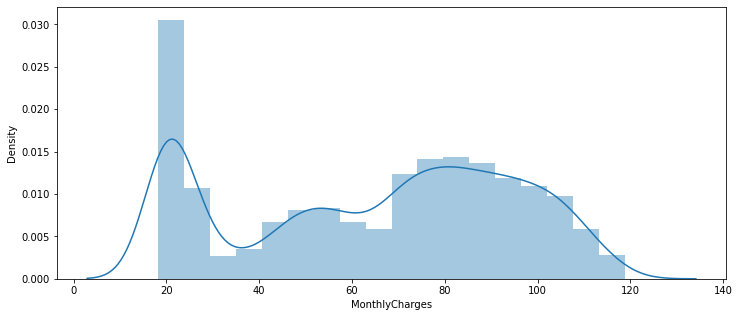

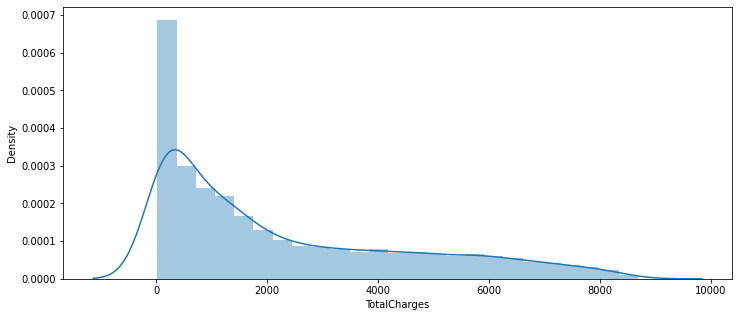

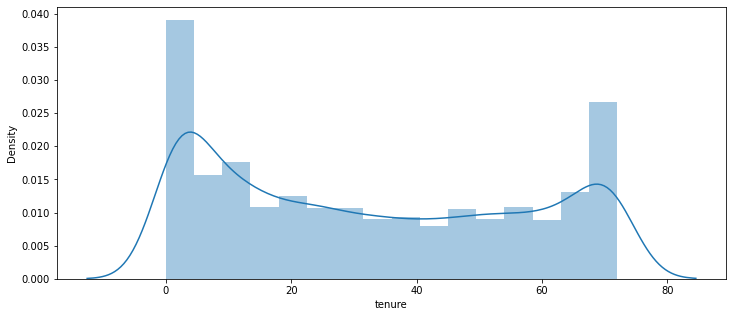

In [35]:
# PLOTTING DISTRIBUTION PLOT OVER  CONTINUOUS COLUMNS

plt.figure(figsize=(12,5))                    # plotting distribution plot  of 'MonthlyCharges'
sns.distplot(df['MonthlyCharges'])

#
plt.figure(figsize=(12,5))                      # plotting distribution plot  of 'TotalCharges'
sns.distplot(df['TotalCharges'])

plt.figure(figsize=(12,5))                     
sns.distplot(df['tenure'])

In [11]:
# target column elements convert into numerical type

df['Churn']= df['Churn'].map({'No':0, 'Yes':1})

In [12]:
#                   APPLY LABLEENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='object'):
    d =le.fit_transform(df[i])               # label encoder conert categorical
    df[i]= d                                            #      value into numeric alphabetical wise eg= a=0,b=1,d=3

In [13]:
print(df.shape)
df.head(3)


(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


<AxesSubplot:>

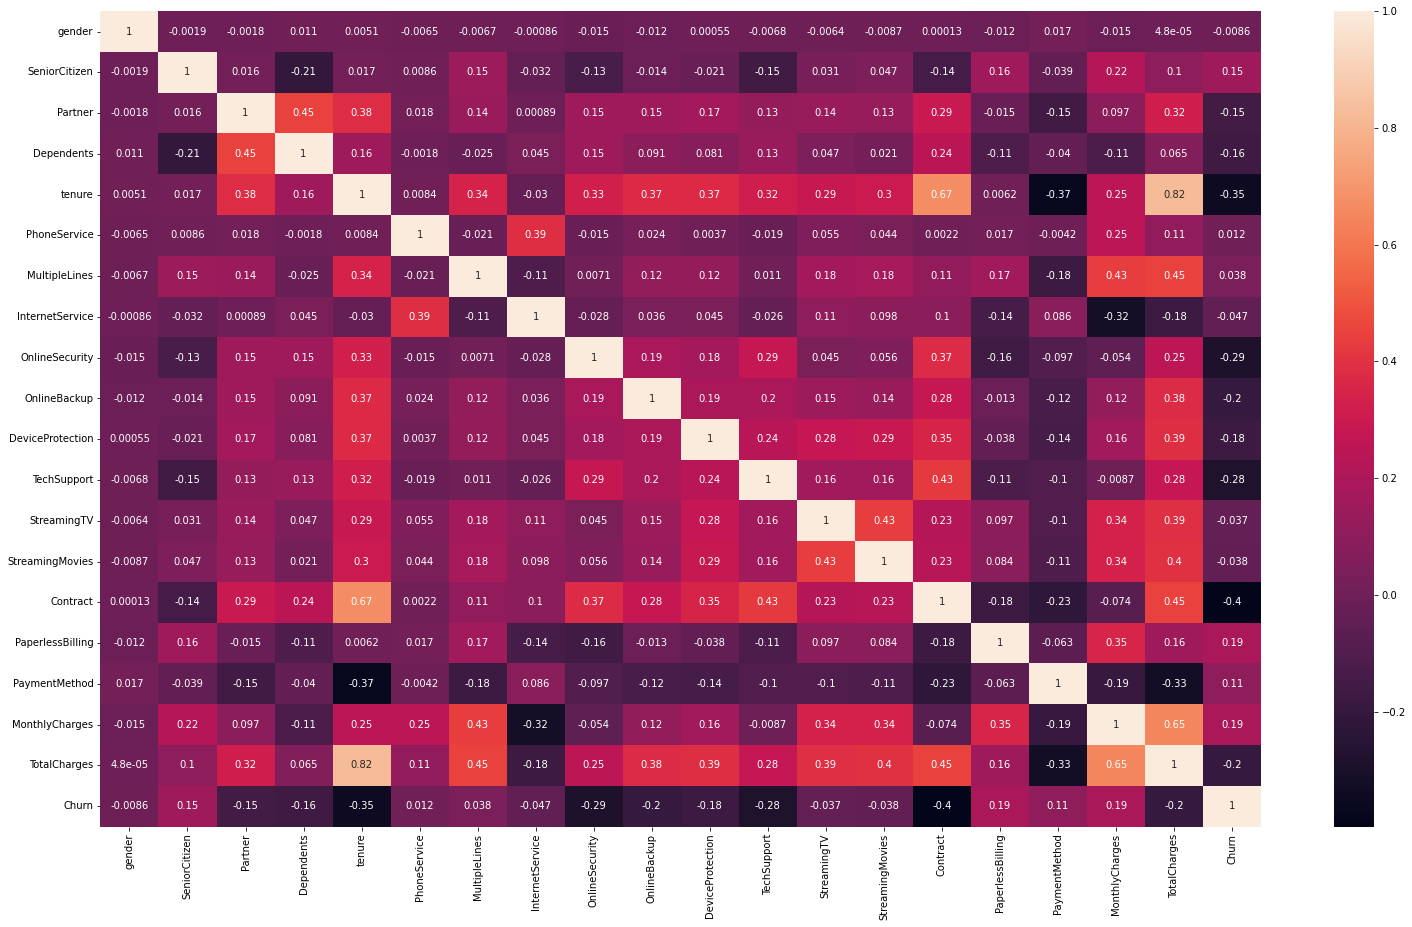

In [98]:

plt.figure(figsize=(26,15)) 
sns.heatmap(df.corr(), annot= True)

# most of the Attributes are negative correlated to target-Attributes
# some Attributes are positive correlated to each other

In [14]:

df[['TotalCharges','MonthlyCharges']].skew()

TotalCharges      0.962394
MonthlyCharges   -0.220524
dtype: float64

In [15]:
# removing sekwness

df['TotalCharges']= np.log1p(df['TotalCharges'])
df['TotalCharges'].skew()

-0.7454022898383424

<AxesSubplot:xlabel='MonthlyCharges'>

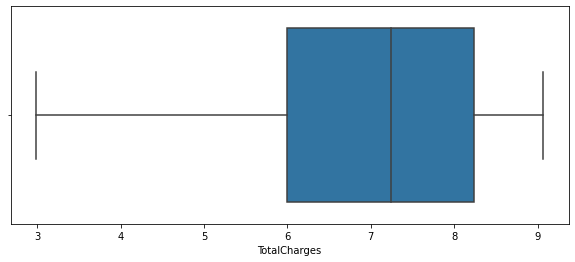

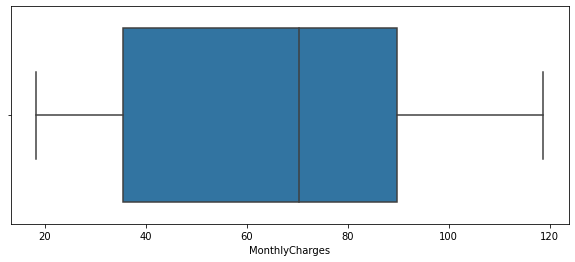

In [47]:
#  plotting boxplot to check outliers 

plt.figure(figsize=(10,4))
sns.boxplot(df['TotalCharges'])

plt.figure(figsize=(10,4))
sns.boxplot(df['MonthlyCharges'])

In [49]:
from scipy.stats import zscore

(np.abs(zscore(df[['TotalCharges','MonthlyCharges']]))<3).all()

TotalCharges      True
MonthlyCharges    True
dtype: bool

In [16]:

x = df.drop('Churn',axis=1)  # Input  Dataset
y= df.Churn                   #  Target-Attribute

In [103]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #
   #  no multicollinearity problem in this dataset

,features,vif_value
0,gender,1.988776
1,SeniorCitizen,1.371295
2,Partner,2.829783
3,Dependents,1.976693
4,tenure,11.210274
5,PhoneService,15.993732
6,MultipleLines,2.765259
7,InternetService,4.324925
8,OnlineSecurity,2.288516
9,OnlineBackup,2.439170


In [18]:
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [19]:
#  SCALING THE DATASET WITH STANDARD SCALER

sc= StandardScaler()
scaled= sc.fit_transform(x)
scaled= pd.DataFrame(scaled, columns=x.columns)



In [20]:
##   let's use  over sampling with SMOTE for Balanced the imbalanced dataset

x_train,x_test, y_train,y_test= train_test_split(scaled,y, test_size=0.20, random_state= 59)

from imblearn.over_sampling import SMOTE
smp= SMOTE(0.70)
xtrain, ytrain= smp.fit_resample(x, y)

print(y.value_counts(),)
print('\n after over_sampling \n', ytrain.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64

 after over_sampling 
 0    5174
1    3621
Name: Churn, dtype: int64


In [21]:
#   MAKE FUNCTION FOR BEST RANDOM_STATE ,       IN TRAINING PROCESS           # finding best random_state

def max_score(model,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,120):
        x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.30,)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",maxf)

In [22]:
#
# 
kfold= KFold(n_splits=5, shuffle=True, random_state=59)


def model_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(y_train,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('roc_auc_score= ', roc_auc_score(y_test, y_pred))

def cross_val(model,x_train,y_train,algo):
        
    cv_score= cross_val_score(model,x_train,y_train,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [23]:

              #  TRAIN & TEST THE MODEL  WITH  LOGISTICREGRESSION
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
max_score(lr, xtrain, ytrain)

maximum accuracy_score is at random state : 50  and it is : 0.7813565744600227
maximum accuracy_score is at random state : 52  and it is : 0.7980295566502463


In [182]:

x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 52,test_size=0.30,)
model_score(lr ,x_train,y_train,x_test,y_test)

training_score = 0.7816764132553606
test_accuracy_score= 0.7968927624100038
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1564
           1       0.73      0.79      0.76      1075

    accuracy                           0.80      2639
   macro avg       0.79      0.80      0.79      2639
weighted avg       0.80      0.80      0.80      2639

roc_auc_score=  0.7957788615951942


In [24]:

              #  TRAIN & TEST THE MODEL  WITH  RANDOMFOREST-CLASSIFIER
from sklearn.ensemble import *
rf = RandomForestClassifier()
max_score(rf, xtrain,ytrain)

maximum accuracy_score is at random state : 50  and it is : 0.8321333838575218
maximum accuracy_score is at random state : 52  and it is : 0.8328912466843501
maximum accuracy_score is at random state : 56  and it is : 0.8366805608184918
maximum accuracy_score is at random state : 94  and it is : 0.8385752178855627


In [200]:

x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 56,test_size=0.30,)
model_score(rf ,x_train,y_train,x_test,y_test)

training_score = 0.9985380116959064
test_accuracy_score= 0.8230390299355816
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1552
           1       0.78      0.79      0.79      1087

    accuracy                           0.82      2639
   macro avg       0.82      0.82      0.82      2639
weighted avg       0.82      0.82      0.82      2639

roc_auc_score=  0.8175755057426568


In [126]:

              #  TRAIN & TEST THE MODEL  WITH  KNN-CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
max_score(knn, xtrain ,ytrain)

maximum accuracy_score is at random state : 50  and it is : 0.7798408488063661
maximum accuracy_score is at random state : 56  and it is : 0.7866616142478211
maximum accuracy_score is at random state : 63  and it is : 0.7877984084880637
maximum accuracy_score is at random state : 84  and it is : 0.7881773399014779
maximum accuracy_score is at random state : 96  and it is : 0.7904509283819628


In [127]:
x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 56,test_size=0.30,)
model_score(knn ,x_train,y_train,x_test,y_test)

training_score = 0.8450292397660819
test_accuracy_score= 0.7866616142478211
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1552
           1       0.70      0.83      0.76      1087

    accuracy                           0.79      2639
   macro avg       0.78      0.79      0.78      2639
weighted avg       0.80      0.79      0.79      2639

roc_auc_score=  0.7938141366097934


In [25]:

              #  TRAIN & TEST THE MODEL  WITH  EXTRATREES-CLASSIFIER
et = ExtraTreesClassifier(bootstrap=True, oob_score=True)
max_score(et, xtrain,ytrain)

maximum accuracy_score is at random state : 50  and it is : 0.8200075786282682
maximum accuracy_score is at random state : 52  and it is : 0.8203865100416825
maximum accuracy_score is at random state : 56  and it is : 0.8344069723380069


In [129]:
x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 62,test_size=0.30,)
model_score(et ,x_train,y_train,x_test,y_test)

training_score = 0.9983755685510072
test_accuracy_score= 0.8260704812428951
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1535
           1       0.80      0.78      0.79      1104

    accuracy                           0.83      2639
   macro avg       0.82      0.82      0.82      2639
weighted avg       0.83      0.83      0.83      2639

roc_auc_score=  0.8190786833781805


In [184]:

                 #  TRAIN & TEST THE MODEL  WITH  GRADIENTBOOSTING-CLASSIFIER
gb= GradientBoostingClassifier()
max_score(gb, xtrain,ytrain)

maximum accuracy_score is at random state : 50  and it is : 0.8086396362258431
maximum accuracy_score is at random state : 52  and it is : 0.8131868131868132
maximum accuracy_score is at random state : 94  and it is : 0.8165971959075408


In [186]:
x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 52,test_size=0.30,)
model_score(gb ,x_train,y_train,x_test,y_test)

training_score = 0.8180636777128005
test_accuracy_score= 0.812807881773399
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1564
           1       0.75      0.81      0.78      1075

    accuracy                           0.81      2639
   macro avg       0.81      0.81      0.81      2639
weighted avg       0.82      0.81      0.81      2639

roc_auc_score=  0.8118235888895498


In [ ]:
LETS  USE  CROSS_VALIDATION

In [134]:

x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 52,test_size=0.30,)
cross_val(lr,x_train,y_train, 'lOGISTIC-REGRESSION')                           #  cross-validation-score   lOGISTIC-REGRESSION
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain ,random_state = 52,test_size=0.30,)
cross_val(gb,x_train,y_train, 'GradientBoosting-classifier')            #    cross-validation GRADIENTBOOSTING-CLASSIFIER
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 62,test_size=0.30,)
cross_val(et ,x_train,y_train,'Extratree-classifier')                             #   cross-validation   EXTRATREE-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 56,test_size=0.30,)
cross_val(rf,x_train,y_train, 'RandomForest')                           #  cross-validation    RANDOMFOREST-CLASSIFIER
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 96,test_size=0.30,)
cross_val(svm ,x_train,y_train, 'KNeighborsClassifier')                      #  cross-validation-score   KNeighborsClassifier



cross_val_score with lOGISTIC-REGRESSION = 0.7794010518320023
********************
cross_val_score with GradientBoosting-classifier = 0.7909350702100498
********************
cross_val_score with Extratree-classifier = 0.8014945351155749
********************
cross_val_score with RandomForest = 0.8110798421724498
********************
cross_val_score with KNeighborsClassifier = 0.7446389009041324


In [ ]:

Out of five models, RandomForest-Classifier & Extratree-classifier have got best accuracy_score, roc_auc_score, cross_validation
   score, now going to Hyperparameter tunning on these two models

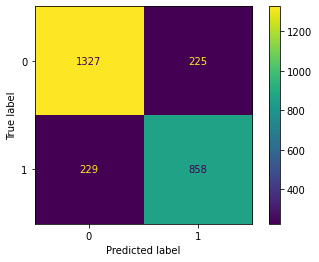

In [211]:
#  PLOTTING CONFUSION MATRIX  ON RANDOMFOREST-CLASSIFIER
x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 56,test_size=0.30,)

rf.fit(x_train,y_train)
predict= rf.predict(x_test)
cm= confusion_matrix(y_test, predict, labels= rf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf.classes_)
disp.plot()
plt.show()


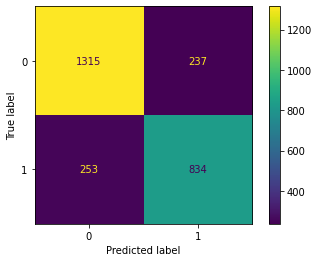

In [212]:
#  PLOTTING CONFUSION MATRIX  on EXTRATREES-CLASSIFIER

et.fit(x_train,y_train)
predict1= et.predict(x_test)
cms= confusion_matrix(y_test, predict1, labels= rf.classes_)
disp1= ConfusionMatrixDisplay(confusion_matrix=cms, display_labels= rf.classes_)
disp1.plot()
plt.show()


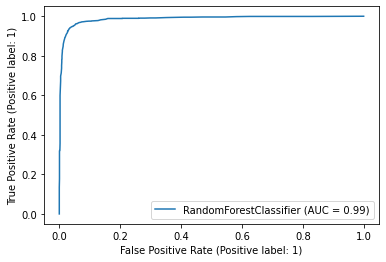

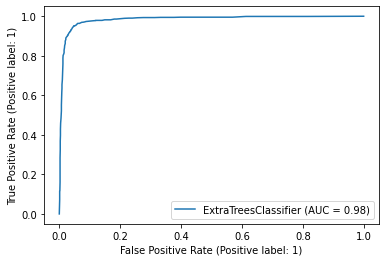

In [135]:
##  PLOT ROC_CURVE


plot_roc_curve(rf, x_test, y_test)        #  plot_roc_curve with RandomForest
plot_roc_curve(et, x_test, y_test)        # plot_roc_curve with ExtraTrees-Classifier

In [ ]:
Conclusion 

RandomForest model          TRUE-NEGATIVE= 1331,    FALSE-POSITIVE= 221
                            FALSE-NEGATIVE = 217   TRUE-POSITIVE= 870
                                        
.TRUE-NEGATIVE  means when the model predicts 'the customer will not left the company' ,
   if model predicts true on it then will  be TRUE-NEGATIVE , and if model predicts wrong on it 
   then  will be FALSE-POSTIVE

.TRUE-POSITIVE  means when the model predicts 'the customer will left the company'(Yes), 
   if model predicts true on it then will  be TRUE-Postive , and if model predicts wrong
   on it then  will be FALSE-NEGATIVE
.
. False-Positive is important on this dataset
. The model whose False-Positive is less, that model will be better

In [187]:

#  HYPERPARAMATER TUNING   with                '''' RANDOMFOREST-classification''''

x_train, x_test,y_train,y_test= train_test_split(xtrain, ytrain, test_size=0.30, random_state= 56)
param= {'n_estimators':[180, 280],'max_depth':[10,13,21] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid = GridSearchCV(rf ,param, cv=kfold,)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 180} 



In [27]:
x_train,x_test,y_train,y_test=train_test_split(xtrain, ytrain,random_state = 56,test_size=0.30,)
G_RF = RandomForestClassifier(max_depth=21,oob_score=True,n_estimators=180, min_samples_split=3,)
G_RF.fit(x_train, y_train)
pred = G_RF.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')
print('confusion_matrix \n ', confusion_matrix(y_test, pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred))

accuracy_score= 0.8389541492989769
classification_report 
                precision    recall  f1-score   support

           0       0.87      0.85      0.86      1552
           1       0.79      0.83      0.81      1087

    accuracy                           0.84      2639
   macro avg       0.83      0.84      0.83      2639
weighted avg       0.84      0.84      0.84      2639
 

confusion_matrix 
  [[1317  235]
 [ 190  897]] 

roc_auc_score = 0.8368947329735676


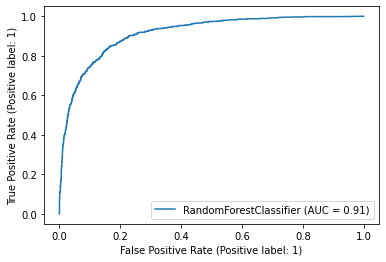

In [28]:
## plotting roc_curve of  hypertunned model 

plot_roc_curve(G_RF, x_test, y_test)

In [ ]:
SAVE THE MODEL 

In [30]:
import pickle

In [31]:
Customer_Churn_Analysis = 'Customer_Churn_Analysis.pickle'

pickle.dump(G_RF,open(Customer_Churn_Analysis, 'wb'))


model= pickle.load(open(Customer_Churn_Analysis, 'rb'))